<a href="https://colab.research.google.com/github/djanglboop/mnist_digit/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNISt Digit Classification

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm


     |████████████████████████████████| 2.1MB 2.8MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114586 sha256=39a5c877bb86c0fcb2c38a0852042b653c70b0654e0599b8c791fe3b3c90a8b0
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


## MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 0s 0us/step


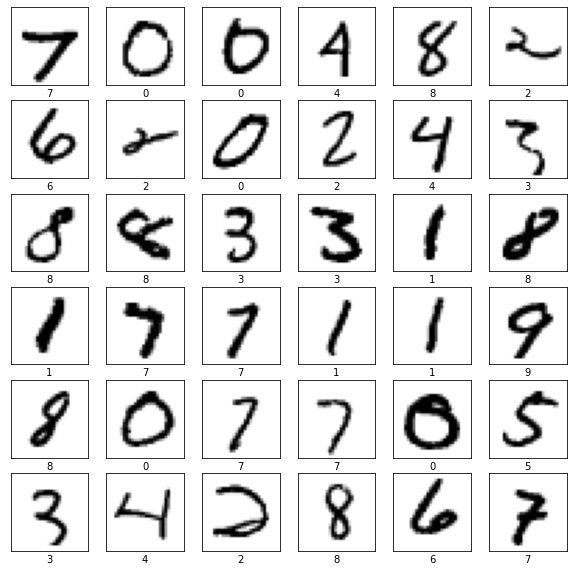

In [0]:
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(60000, 36)
for i in range(36):
  plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])

## NN for Handwritten Digit Classification

In [0]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # Define the activation function for the first fully connected (Dense) layer
      tf.keras.layers.Dense(128, activation=tf.nn.relu),

      # Definr the second Dense layer to output the classification probabilities
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return fc_model

model = build_fc_model()

## Compile the model

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [0]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3739 - accuracy: 0.8960
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1981 - accuracy: 0.9446
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1485 - accuracy: 0.9579
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1200 - accuracy: 0.9663
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1007 - accuracy: 0.9717


In [0]:
# Use evaluate method to test the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9702
Test accuracy: 0.9702000021934509


## Convollutional Neural Network (CNN) for handwritten digit classification

### Define the CNN model

In [0]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
      
      # Define the first convolutional layer
      tf.keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation="relu"),

      # Define the first max pooling layer
      tf.keras.layers.MaxPool2D((2, 2)),

      # Define the second convolutional layer
      tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation="relu"),

      # Define the second max pooling layer
      tf.keras.layers.MaxPool2D((2, 2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation="relu"),

      # Define the last Dense layer to output the classification
      # probabilities.
      tf.keras.layers.Dense(10, activation="softmax")
  ])

  return cnn_model

cnn_model = build_cnn_model()

# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])

# Print the summary of the layers in the model
print(cnn_model.summary)

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f0a9bbf37b8>>


### Train and test the CNN model

In [0]:
# Define the compile operation 
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:
# Train the CNN model using fit 
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 32s 34ms/step - loss: 2.3020 - accuracy: 0.1088
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 2.3020 - accuracy: 0.1103
Epoch 3/5
938/938 [==============================] - 32s 34ms/step - loss: 2.3021 - accuracy: 0.1104
Epoch 4/5
938/938 [==============================] - 32s 35ms/step - loss: 2.3021 - accuracy: 0.1101
Epoch 5/5
938/938 [==============================] - 32s 34ms/step - loss: 2.3021 - accuracy: 0.1102


In [0]:
# Using evaluate mathod to test the model
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print("test accuracy: ", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 2.3021 - accuracy: 0.1135
test accuracy:  0.11349999904632568


### Make predictions with the CNN model

In [0]:
predictions = cnn_model.predict(test_images)

In [0]:
predictions[0]

array([0.10485537, 0.11007428, 0.09437201, 0.10693827, 0.09618717,
       0.08572149, 0.09434648, 0.10624769, 0.10348941, 0.09776781],
      dtype=float32)

In [0]:
prediction = np.argmax(predictions[0])

print(prediction)

1


Label of this digit is: 7


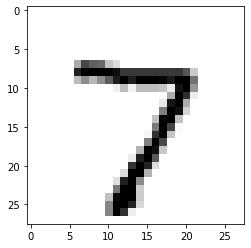

In [0]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

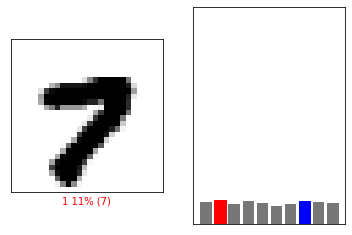

In [0]:
# Change the slider to look at the model's predictions

image_index = 79
plt.subplot(1, 2, 1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
mdl.lab2.plot_value_prediction(image_index, predictions, test_labels)

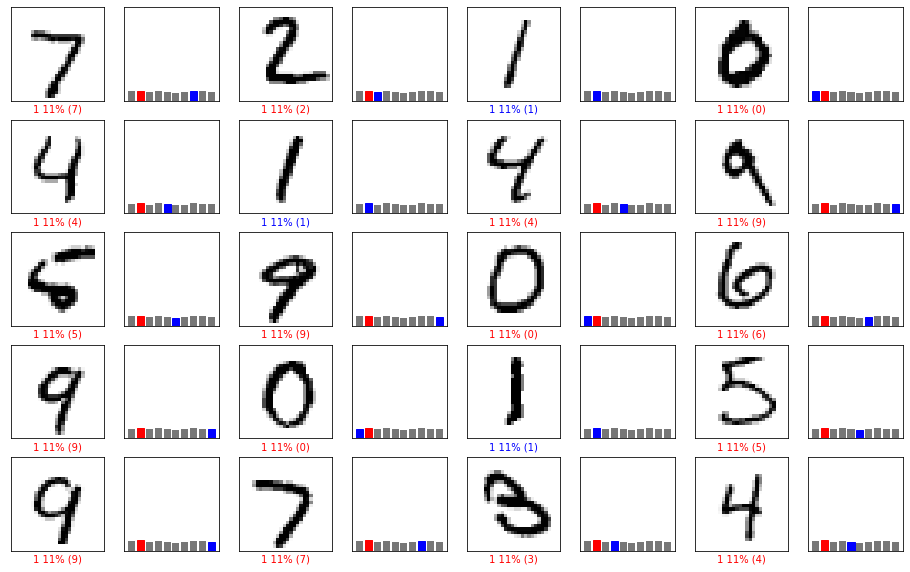

In [0]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

## Training the model 2.0

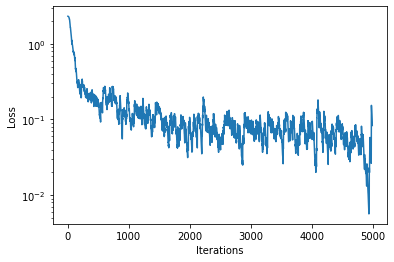

100%|██████████| 5000/5000 [01:46<00:00, 46.98it/s]


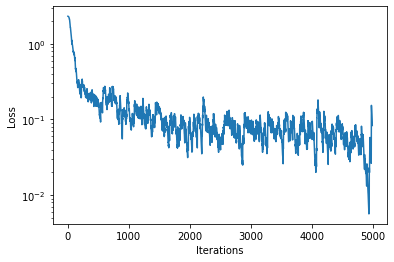

In [0]:
# Reduild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)  # to record the evolution of loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel="Iterations", ylabel="Loss", scale="semilogy")
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

if hasattr(tqdm, "_instances"): tqdm._instances.clear()  # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiaton operations
  with tf.GradientTape() as tape:
    logits = cnn_model(images)

    # Compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
  
  loss_history.append(loss_value.numpy().mean())  # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))